### `Active learning`

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import hdbscan



from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from IPython.display  import display_html
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split



%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

`Loading data`

In [3]:
digits = load_digits()
data = digits.data


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)


In [5]:
clusterer= hdbscan.HDBSCAN(min_cluster_size=12, min_samples=1,prediction_data=True)
clusterer.fit(digits.data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=12, min_samples=1, p=None,
    prediction_data=True)

In [6]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]
lambda_value = list(set(cluster_tree['lambda_val'].values))
lambda_value.append(0.03)
sorted_list = sorted(lambda_value)


In [8]:
def average_point(n,cluster_label):
    '''
    
    This function is to help find the centriod of a 
    cluster.
    
    Cluster_label is the number assignedf to the cluster
    not the target label.
    
    '''
    #mem_cluster= digits.data[np.argwhere(fin_clusterer.labels_==0).reshape(1, -1)[0]]
    #when using digits,data
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[n], min_cluster_size=12)
    mem_cluster = digits.images[np.argwhere(clusterpt_cut== cluster_label).reshape(1, -1)[0]]
    #mem_cluster = digits.images[np.argwhere(clusterer.labels_== cluster_label).reshape(1, -1)[0]]

    #centriod= np.zeros(64)
    avg = np.zeros(shape=(8,8))
    for i in range(0,len(mem_cluster)):
        avg += mem_cluster[i]
    return(avg/len(mem_cluster))

    

In [10]:
def cen_det(n):
    emp= np.array([[]])
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[n], min_cluster_size=12)
    for j in range(0,clusterpt_cut.max()+1):
        emp = np.append(emp,average_point(n,j))
    
    return np.reshape(emp, (clusterpt_cut.max()+1,8,8)) 
#t(1)

In [11]:
dict_label ={'0': np.array([5]),'1': np.array([7,5]), '2':np.array([7,5,7]),
             '3':np.array([0,7,5,7]), '4': np.array([0,7,1,5,7]),'5': np.array([0,7,1,2,5,7]),
             '6': np.array([4,0,7,1,2,5,7]), '7':np.array([4,0,9,1,2,5,7]),'8':np.array([4,0,9,1,2,5,6,7]),
            '9': np.array([4,0,3,9,1,2,5,6,7]), '10':np.array([4,0,9,1,2,5,6,3,7]), 
            '11':np.array([4,0,9,9,1,2,5,6,3,7]), '12': np.array([5,4,0,9,9,1,2,5,6,3,7]),
             '13':np.array([5,4,0,9,9,1,2,5,5,6,3,7]), '14':np.array([5,4,0,9,9,1,2,5,6,5,1,3,7]),
            '15':np.array([5,8,4,0,9,9,1,2,5,6,1,3,7]),'16':np.array([1,5,8,4,0,9,9,1,2,5,6,1,3,7]),
            '17':np.array([1,5,8,4,0,9,1,2,5,6,1,3,7]),'18':np.array([1,5,8,4,0,9,1,2,5,4,6,1,3,7]),
            '19':np.array([1,5,5,8,4,0,9,1,2,5,4,6,1,3,7]),'20':np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,3,7]),
            '21': np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,1,3,7]),'22':np.array([1,5,5,4,0,4,2,9,1,2,5,4,6,1,1,3,7]),
            '23':np.array([1,5,4,0,4,9,9,1,2,5,6,1,3,7]), '24':np.array([9,1,5,4,0,4,9,9,1,2,6,1,3,7]),
             '25':np.array([1,5,4,0,4,2,9,1,2,6,1,9,3,7]),'26':np.array([1,5,4,0,4,2,2,9,1,2,6,1,9,3,7]),
            '27': np.array([1,5,4,0,4,7,2,2,9,1,2,6,1,3,7]), '28':np.array([1,5,4,0,4,7,2,9,1,2,6,7,1,3,7]), 
             '29':np.array([4,0,4,9,1,6,7,1,2,3,7]), '30':np.array([0,4,6,7,1,2,3]),
             '31':np.array([0,6,4,6,7,1,6,2,3]),'32': np.array([6,0,1,0])}



### Fitting a classifier for the centriods at each level of hierarchy

In [113]:
accuracy_results=[]
train_interval1=[]
for i in range(0,23):
    rf_model = RandomForestClassifier(random_state=11)
    x_train = [j.reshape(64) for j in cen_det(i)]
    y_train = dict_label.get(str(i))
    rf_model.fit(x_train, y_train)
    train_interval1.append(len(dict_label.get(str(i))))
    
    # predicting the model for X_test sample 
    
    x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
    #y_test = digits.target
    y_predtest = rf_model.predict(x_test)
    # classification accuracy for the test data prediction verses actual

    pred_acc = accuracy_score(y_predtest, Y_test)
    accuracy_results.append(pred_acc)

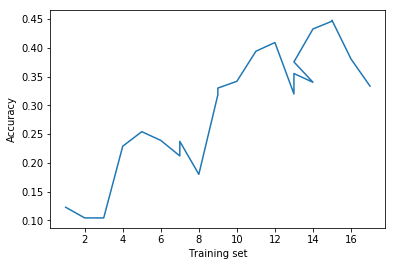

In [114]:
plt.plot(train_interval1,accuracy_results)
plt.xlabel('Training set')
plt.ylabel('Accuracy')
#plt.legend()
plt.show()

In [97]:
def selector(y,pos):
    '''
    This function returns the indices
    to  each label
    y : is the array of labels
    pos : is the indicator of the label in the 
    ''' 

    ind = []
    for i in range(10):
        ind.append(np.argwhere(y==i).reshape(1, -1)[0,pos])
    return ind

In [16]:
def Rand_checker(known_list, sample_size, upper_limit):
    '''
    This function generates random numbers
    to be used as subsequence indices for 
    the other sample
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    '''
    
    Rand_set = []
    while len(Rand_set) < sample_size:
        r = np.random.randint(upper_limit)
        if r not in Rand_set and r not in known_list:
            Rand_set.append(r)
    return Rand_set

In [17]:
def generate_index(known_list, sample_size, upper_limit):
    '''
    This function return the indices  for all
    for all the subsamples to be consider
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    
    '''
    index_lst=[]
    while len(known_list) < upper_limit:
        if sample_size > upper_limit - len(known_list):
            sample_size = upper_limit - len(known_list)
        index_lst.append(known_list.copy())
        L = Rand_checker(known_list, sample_size, upper_limit)
        known_list.extend(L)
    index_lst.append(known_list.copy())
    return index_lst

In [100]:
labelpt= []
for i in range(0,33):
    labelpt+=list(dict_label.get(str(i)))
y1 = np.array(labelpt)

In [101]:
creat_all = np.array([])
for i in range(0,len(sorted_list)):
    creat_all = np.append(creat_all,cen_det(i))
df = creat_all.reshape(len(y1),8,8)


### `I decided to gather all the centriod at each level and now build a classifer by first choosing a sample of ten that representative of our labels and subsequently increasing the size of the training set`

In [102]:
k = generate_index(selector(y1,0),10,len(df))

#train_results = []
accuracy_results1=[]
train_interval=[]
for i in k:
    rf_model = RandomForestClassifier(random_state=11)
    x_train = [df[j].reshape(64) for j in i]
    rf_model.fit(x_train, y1[i])
    train_interval.append(len(i))
    #x_train = [X_train[j].reshape(64) for j in i]
    # predicting the model for X_test sample 
    
    #x_test = [ l.reshape(64) for l in digits.images]
    x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
    #y_test = digits.target
    #x_train = [X_train[r].reshape(64) for r in range(len(X_train))]
    y_predtest = rf_model.predict(x_test)
    #y_predtrain = rf_model.predict(x_train)

    # classification accuracy for the test data prediction verses actual
    #pred_trac = accuracy_score(y_predtrain, Y_train[i])
    pred_acc1 = accuracy_score(y_predtest, Y_test)
#train_results.append(pred_trac)
    accuracy_results1.append(pred_acc1)
    

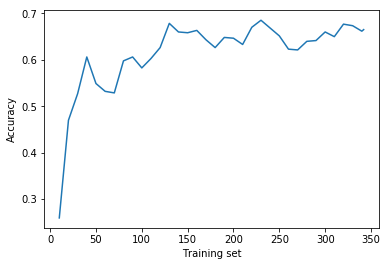

In [103]:
plt.plot(train_interval,accuracy_results1)
plt.xlabel('Training set')
plt.ylabel('Accuracy')
#plt.legend()
plt.show()

### `Following this, I decision to not only collect the centriod but randomly take two more extra members of the cluster at each level and repeat the procedure`.

In [49]:
def selecting_other(n,cluster_label,num):
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[n], min_cluster_size=12)
    mem_cluster = digits.images[np.argwhere(clusterpt_cut== cluster_label).reshape(1, -1)[0]]
    return mem_cluster[0:num]
    
    
#len(selecting_other(1,1))

In [66]:
def t(n,num):
    emp= np.array([[]])
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[n], min_cluster_size=12)
    for j in range(0,clusterpt_cut.max()+1):
        emp = np.append(emp,average_point(n,j))
        emp = np.append(emp,selecting_other(n,j,num))
    b= (clusterpt_cut.max()+1)*num
    return np.reshape(emp, (clusterpt_cut.max()+1+b,8,8)) 
#t(0,1).shape

In [51]:
def assign_label(cluster_label):
    dict_label ={'0': np.array([5]),'1': np.array([7,5]), '2':np.array([7,5,7]),
             '3':np.array([0,7,5,7]), '4': np.array([0,7,1,5,7]),'5': np.array([0,7,1,2,5,7]),
             '6': np.array([4,0,7,1,2,5,7]), '7':np.array([4,0,9,1,2,5,7]),'8':np.array([4,0,9,1,2,5,6,7]),
            '9': np.array([4,0,3,9,1,2,5,6,7]), '10':np.array([4,0,9,1,2,5,6,3,7]), 
            '11':np.array([4,0,9,9,1,2,5,6,3,7]), '12': np.array([5,4,0,9,9,1,2,5,6,3,7]),
             '13':np.array([5,4,0,9,9,1,2,5,5,6,3,7]), '14':np.array([5,4,0,9,9,1,2,5,6,5,1,3,7]),
            '15':np.array([5,8,4,0,9,9,1,2,5,6,1,3,7]),'16':np.array([1,5,8,4,0,9,9,1,2,5,6,1,3,7]),
            '17':np.array([1,5,8,4,0,9,1,2,5,6,1,3,7]),'18':np.array([1,5,8,4,0,9,1,2,5,4,6,1,3,7]),
            '19':np.array([1,5,5,8,4,0,9,1,2,5,4,6,1,3,7]),'20':np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,3,7]),
            '21': np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,1,3,7]),'22':np.array([1,5,5,4,0,4,2,9,1,2,5,4,6,1,1,3,7]),
            '23':np.array([1,5,4,0,4,9,9,1,2,5,6,1,3,7]), '24':np.array([9,1,5,4,0,4,9,9,1,2,6,1,3,7]),
             '25':np.array([1,5,4,0,4,2,9,1,2,6,1,9,3,7]),'26':np.array([1,5,4,0,4,2,2,9,1,2,6,1,9,3,7]),
            '27': np.array([1,5,4,0,4,7,2,2,9,1,2,6,1,3,7]), '28':np.array([1,5,4,0,4,7,2,9,1,2,6,7,1,3,7]), 
             '29':np.array([4,0,4,9,1,6,7,1,2,3,7]), '30':np.array([0,4,6,7,1,2,3]),
             '31':np.array([0,6,4,6,7,1,6,2,3]),'32': np.array([6,0,1,0])}


    return dict_label.get(str(cluster_label))
#[assign_label(1)[0]]*12

In [108]:
def yla(n,num):
    o_= []
    r= assign_label(n)
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[n], min_cluster_size=12)
    for j in range(0,clusterpt_cut.max()+1):
            o_ += [r[j]]*(num+1)
    return o_
#     for i in range(0,4):
#         
#yla(0,2)

In [109]:
# def finlab(num):
#     lst = []
#     for i in range(0,33):
#         lst += yla(i,num)
#     y3 = np.array(lst)
#     return y3
# len(finlab(1))
lst = []
for i in range(0,33):
    lst += yla(i,2)
y3 = np.array(lst)
y3.shape

(1026,)

In [110]:
# def findata(num):
#     lstda = np.array([])
#     for i in range (0,33):
#         lstda = np.append(lstda, t(i,num))
#     df3 = lstda.reshape(len(finlab(num)),8,8)   
#     return df3
# findata(1).shape
lstda = np.array([])
for i in range (0,33):
    lstda = np.append(lstda, t(i,2))
df3 = lstda.reshape(len(y3),8,8)   
df3.shape

(1026, 8, 8)

In [111]:
k3 = generate_index(selector(y3,0),10,len(df3))

#train_results = []
accuracy_results3=[]
train_interval3=[]
for i in k3:
    rf_model = RandomForestClassifier(random_state=11)
    x_train = [df3[j].reshape(64) for j in i]
    rf_model.fit(x_train, y3[i])
    train_interval3.append(len(i))
    #x_train = [X_train[j].reshape(64) for j in i]
    # predicting the model for X_test sample 
    
    #x_test = [ l.reshape(64) for l in digits.images]
    x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
    #y_test = digits.target
    #x_train = [X_train[r].reshape(64) for r in range(len(X_train))]
    y_predtest = rf_model.predict(x_test)
    #y_predtrain = rf_model.predict(x_train)

    # classification accuracy for the test data prediction verses actual
    pred_acc1 = accuracy_score(y_predtest, Y_test)
    accuracy_results3.append(pred_acc1)
    

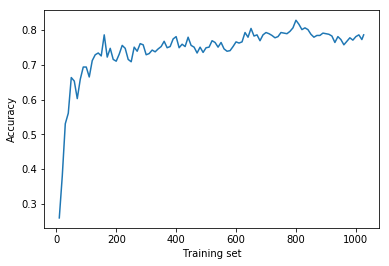

In [112]:
plt.plot(train_interval3,accuracy_results3)
plt.xlabel('Training set')
plt.ylabel('Accuracy')
plt.show()